# Exploratory Data Analysis


#### Initial Setups

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.chdir("..")

In [2]:
# matplotlib style
plt.style.use('ggplot')

# use latex font
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


### Read Data

In [3]:
data = pd.read_csv("data/coffee_data_v2.csv")
data.rename({"Unnamed: 0": "TOD"}, axis=1, inplace=True)  # rename the first column to "time of day"

# convert the time of day to a float
data["TOD"] = pd.to_datetime(data["TOD"], format="%I:%M %p").dt.time
data["TOD"] = data["TOD"].apply(lambda x: x.hour + x.minute / 60.0) # as float

# remove time since roasted greater than 100
data = data[data["Time since roasted (days)"] <= 100]

In [4]:
data.head()

,TOD,Coffee no. (of day),Weight,Bloom,hot water amount,Brew length (s),Amount hot water after,Time since roasted (days),Rating /10
13,9.166667,1,10,1,144,61,38,6.0,7
14,11.500000,2,12,1,140,51,35,6.0,8
15,9.000000,1,14,0,132,77,78,7.0,7
16,9.333333,1,12,1,160,64,0,8.0,8
17,12.333333,2,18,0,141,150,55,8.0,5
18,10.000000,1,12,1,183,90,0,9.0,4
19,13.250000,2,11,1,60,60,81,9.0,9
20,10.250000,1,14,0,85,84,90,10.0,8
21,13.500000,2,13,1,64,64,81,10.0,7
22,9.500000,1,12,1,109,90,60,14.0,7


## Initial Plots

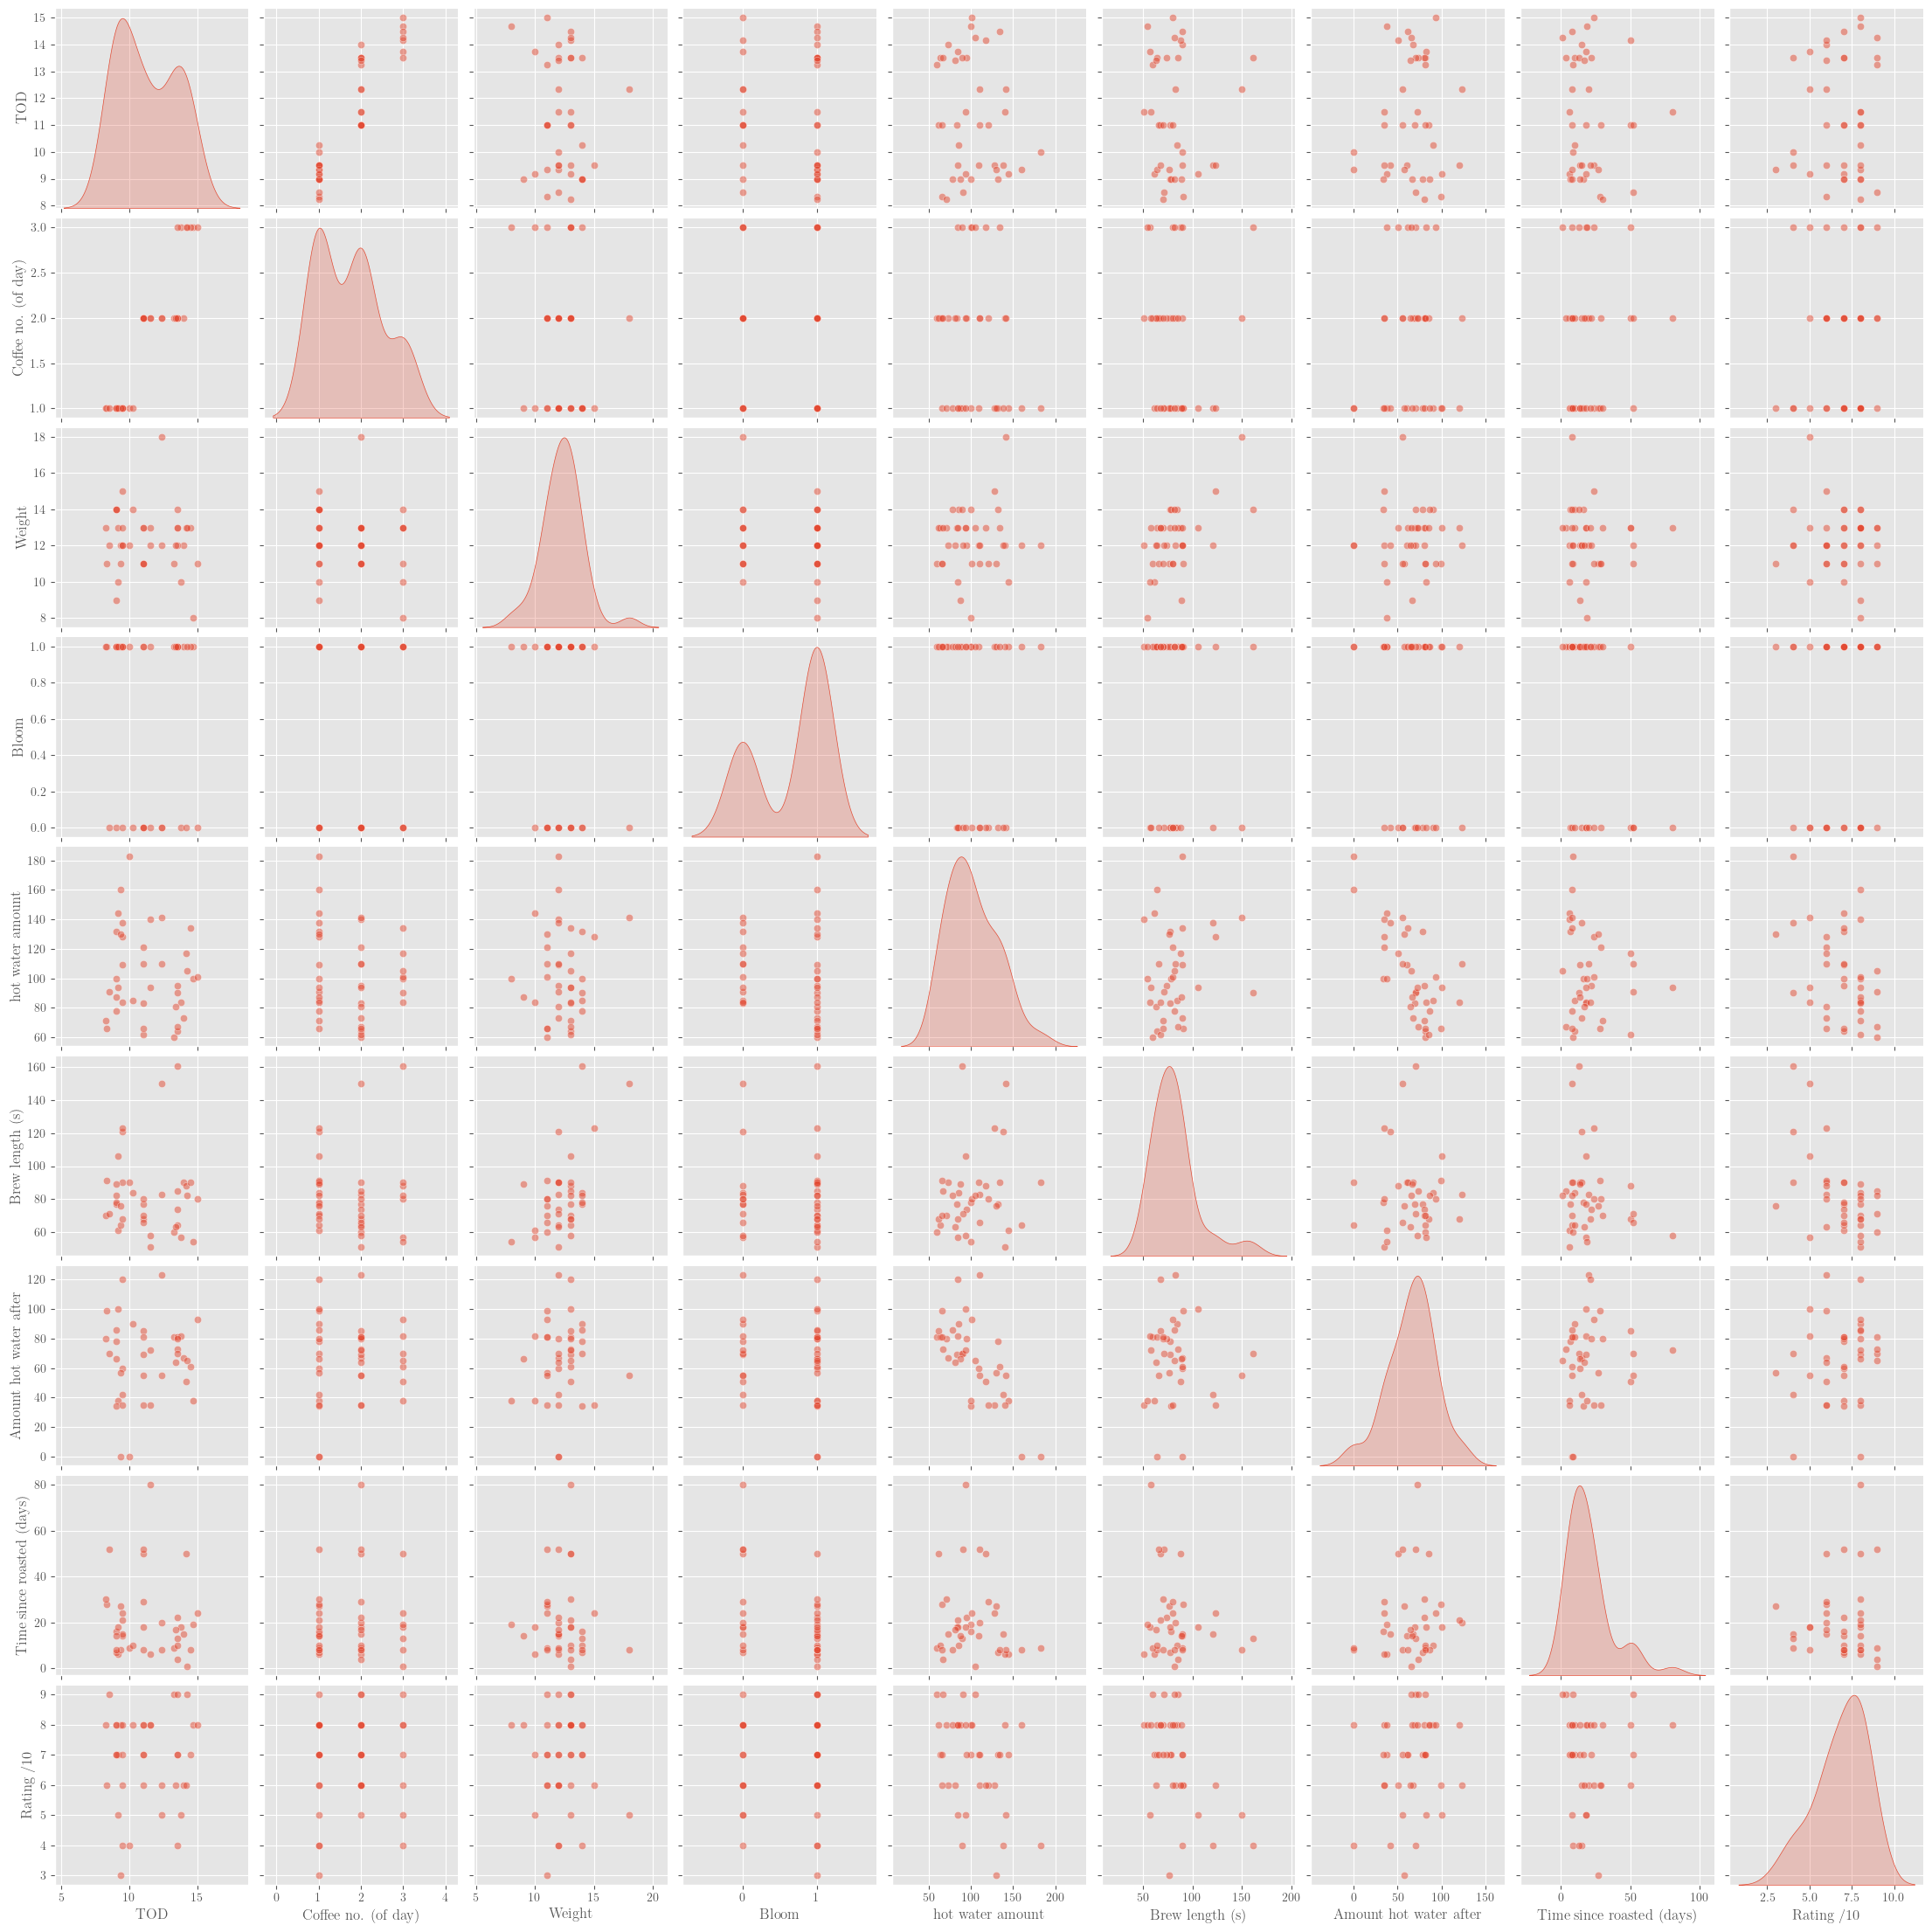

In [6]:
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha': 0.5})

From initial looks of things, the most relevant features that impact rating are:
 - Time since roasted
 - Brew length
 - Hot water amount

There is also an issue in how discrete the measurements are. E.g., weight is rounded to the nearest whole number because the scales are not that precise.


We can look at these in more detail at the interesting variables and also report their Pearson correlation coefficients.

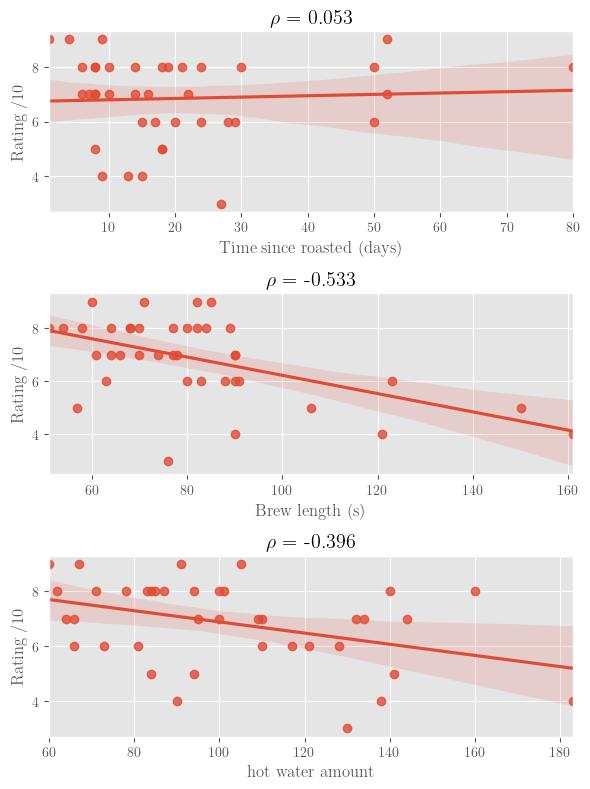

In [39]:
from scipy.stats import pearsonr

fig, ax = plt.subplots(3, 1, figsize=(6, 8))
sns.regplot(data=data, x="Time since roasted (days)", y="Rating /10", ax=ax[0]).set(title=f"$\\rho$ = {pearsonr(data['Time since roasted (days)'], data['Rating /10'])[0]:.3f}")
sns.regplot(data=data, x="Brew length (s)", y="Rating /10", ax=ax[1]).set(title=f"$\\rho$ = {pearsonr(data['Brew length (s)'], data['Rating /10'])[0]:.3f}")
sns.regplot(data=data, x="hot water amount", y="Rating /10", ax=ax[2]).set(title=f"$\\rho$ = {pearsonr(data['hot water amount'], data['Rating /10'])[0]:.3f}")
fig.tight_layout()


Later we can see how well this matches with a linear regression model.

## Some Interesting Statistics

<AxesSubplot:xlabel='Coffee no. (of day)', ylabel='Count'>

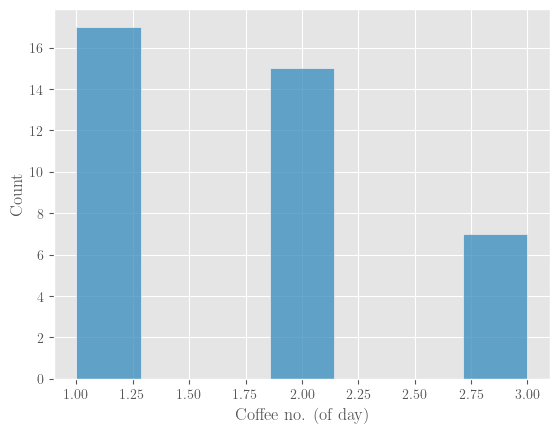

In [19]:
sns.histplot(data["Coffee no. (of day)"])

In [26]:
perc = (data["Coffee no. (of day)"] == 3).mean()
print(f"Percentage of times I had three coffees in a day: {perc * 100:.2f}%")

Percentage of times I had three coffees in a day: 17.95%


In [29]:
print(f"Average rating: {data['Rating /10'].mean():.2f}")

Average rating: 6.85
